# Explorando detecção de borda

## Importando bibliotecas

In [1]:
import numpy as np
import seaborn as sns

from zipfile import ZipFile
from matplotlib import pyplot as plt
from skimage.io import imread

TARGETS = ['normal', 'broca', 'fissura', 'musgo']
sns.set_style(style='darkgrid')
plt.gray()

<Figure size 432x288 with 0 Axes>

In [2]:
path_list = []
with ZipFile('./outras-2.zip') as zip_file:
  for path in zip_file.namelist():
    if '__MAC' not in path \
        and '.JPG' in path:
      path_list.append(f'./outras-2.zip/{path}')

## Explorando soma dos píxels (vertical e horizontal) em escala de cinza

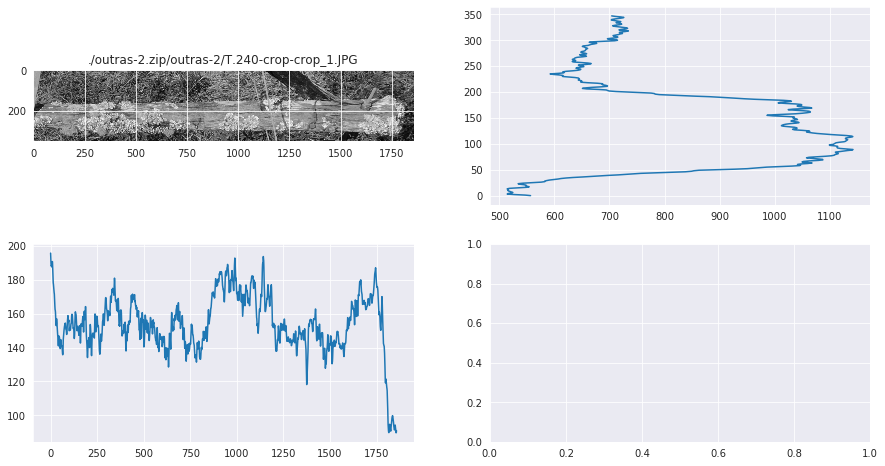

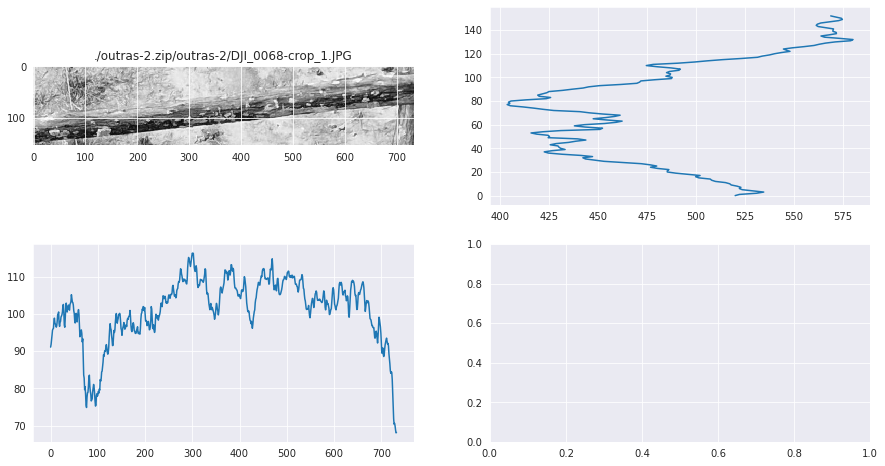

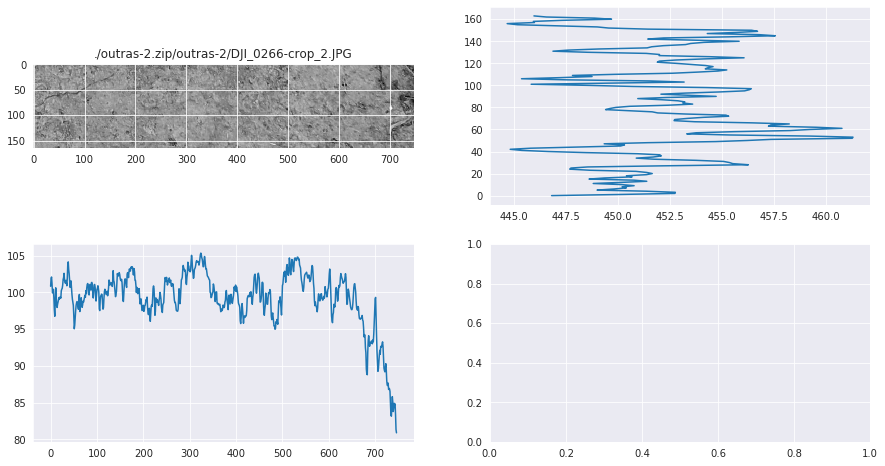

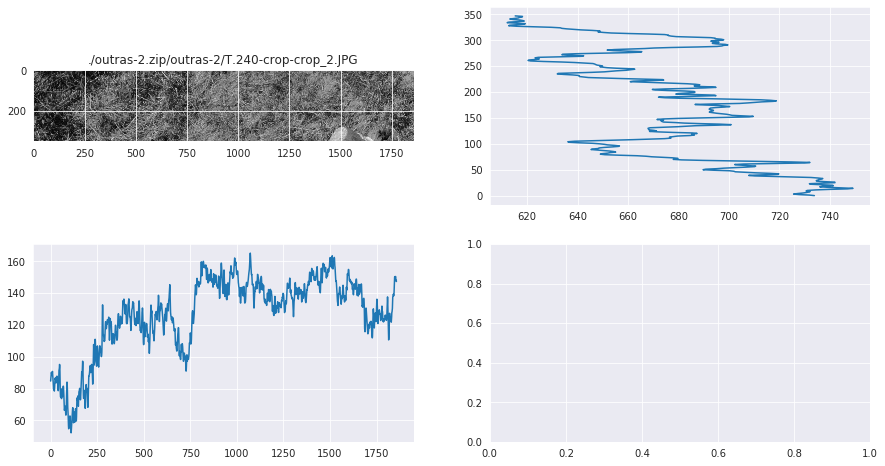

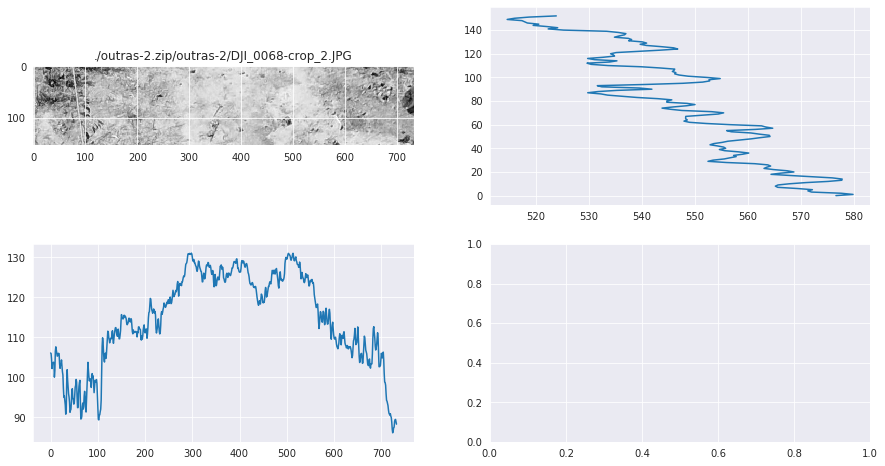

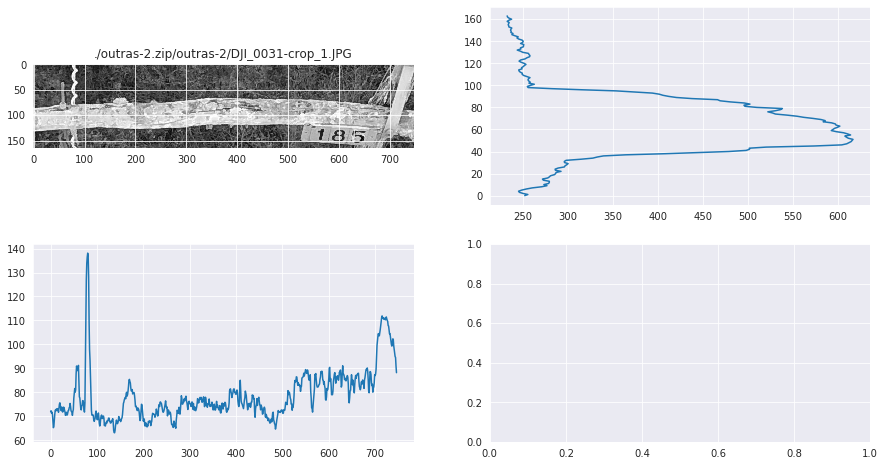

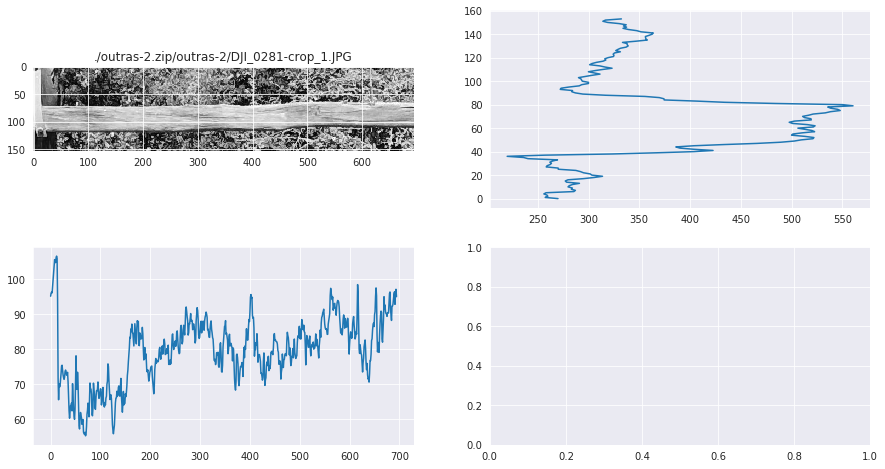

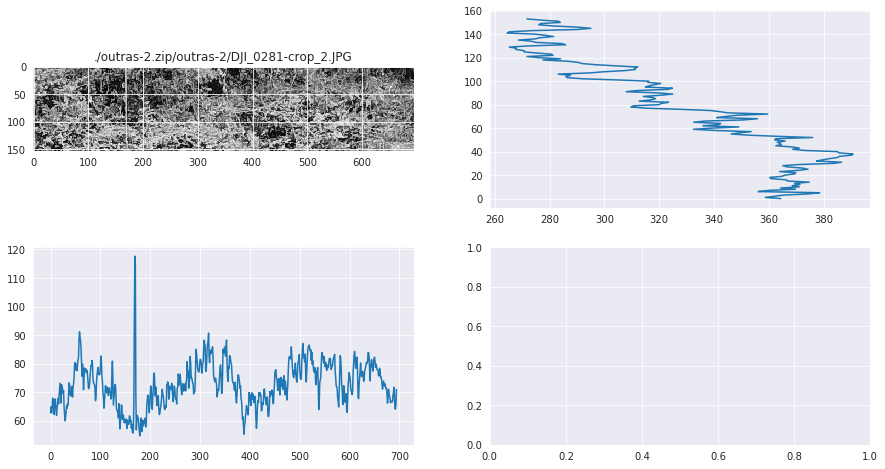

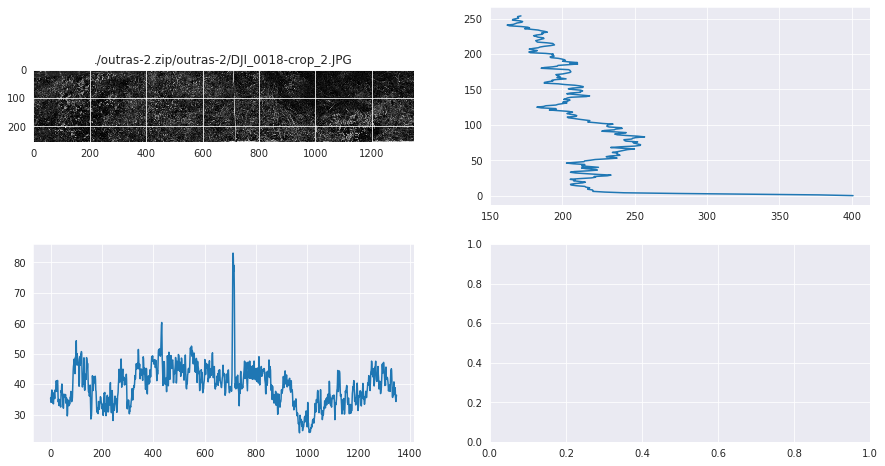

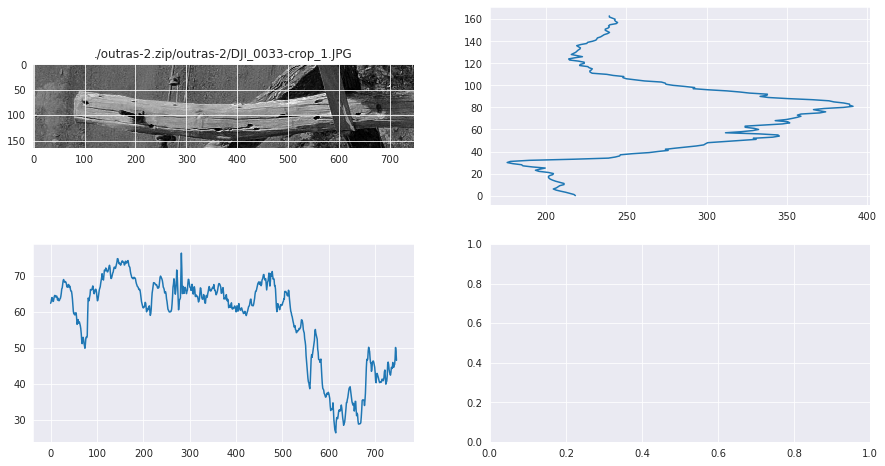

In [3]:
for path in path_list:
  img:np.ndarray = imread(path, as_gray=True)
  
  h, w = img.shape

  soma_vertical = img.sum(axis=0)
  soma_horizontal = img.sum(axis=1)

  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
  ax[0, 0].title.set_text(path)
  ax[0, 0].imshow(img)
  ax[0, 1].plot(soma_horizontal, range(h-1, -1, -1))
  ax[1, 0].plot(range(w), soma_vertical)

  plt.show()


## Explorando soma de variância dos píxels (na vertical e horizontal)

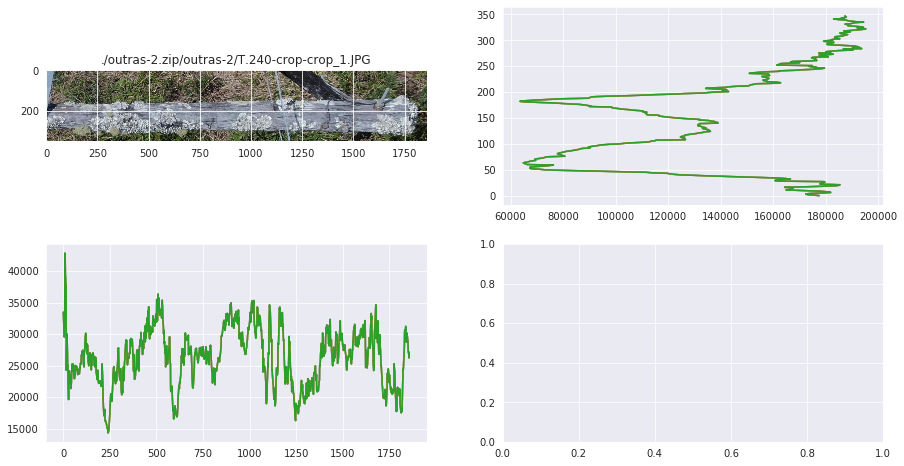

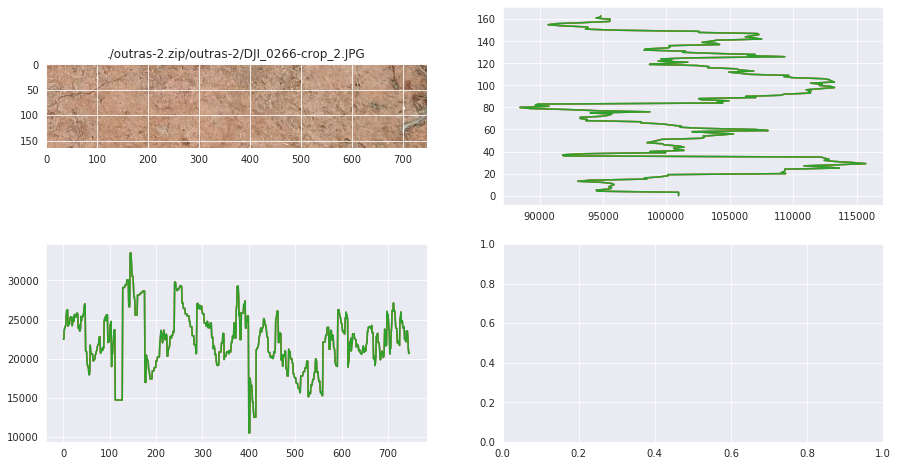

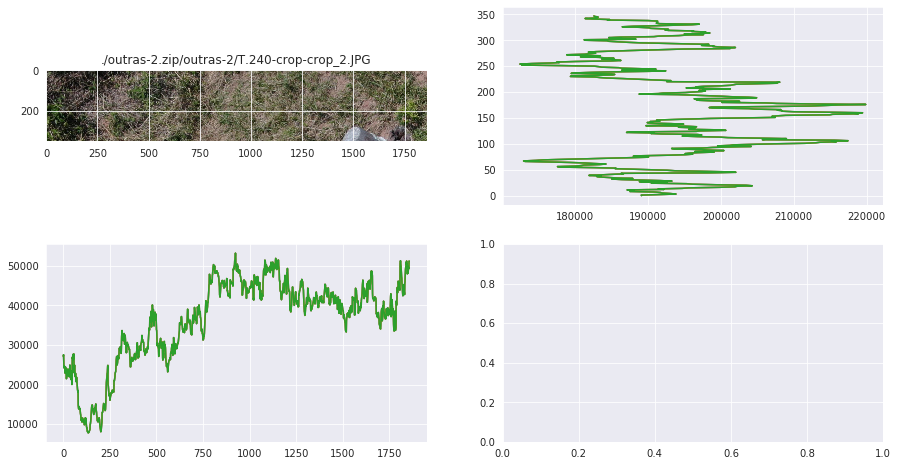

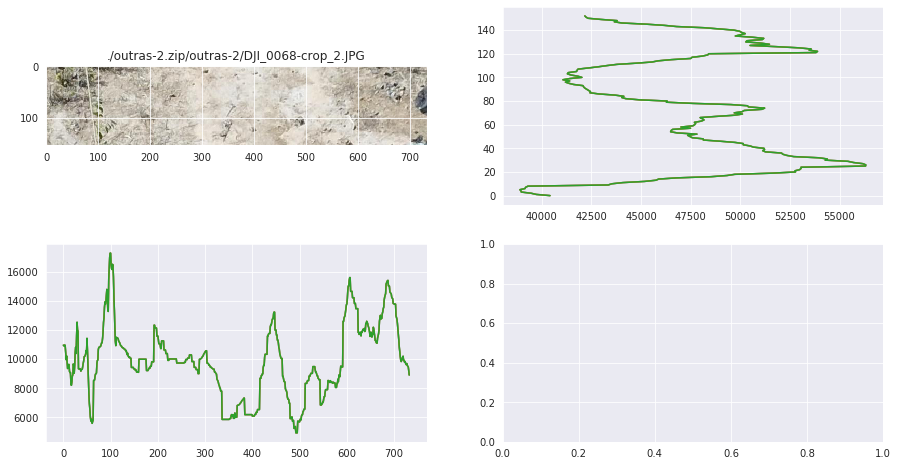

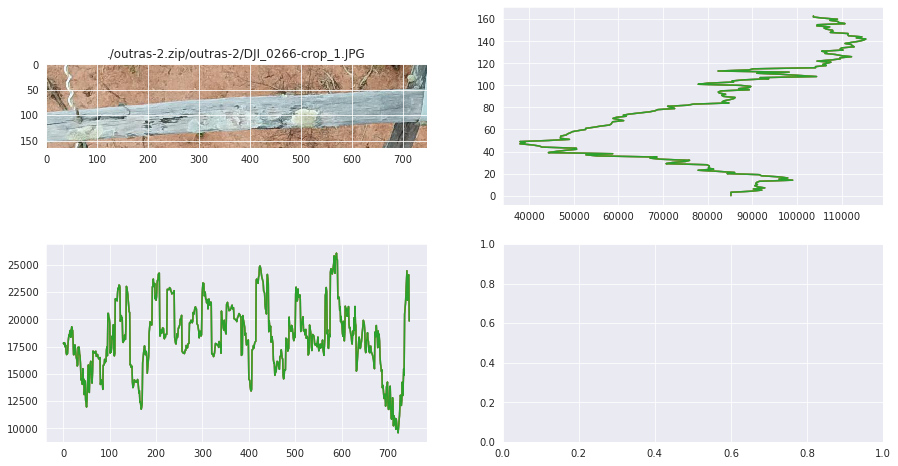

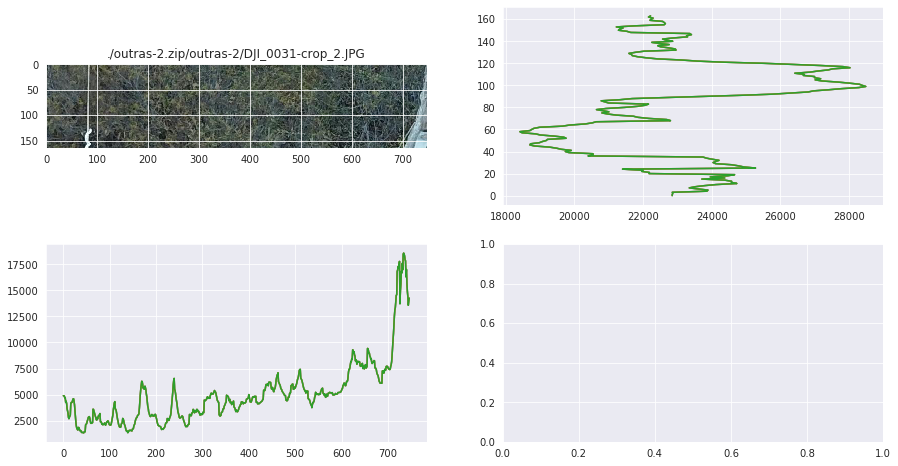

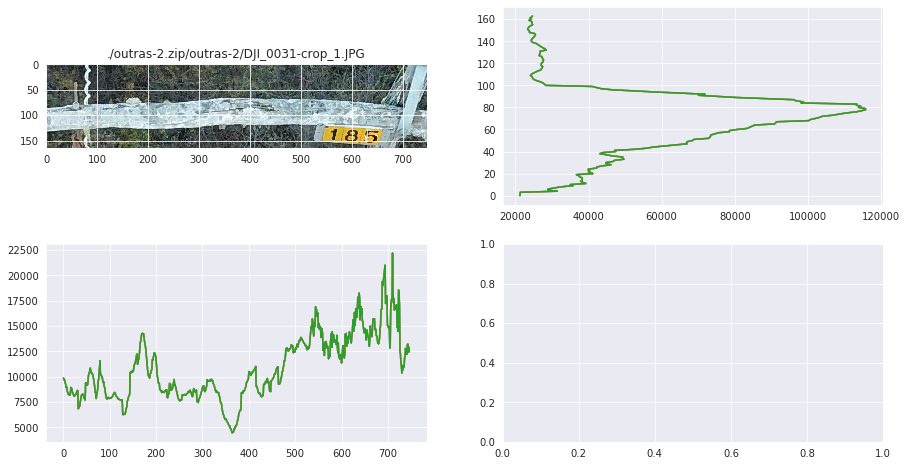

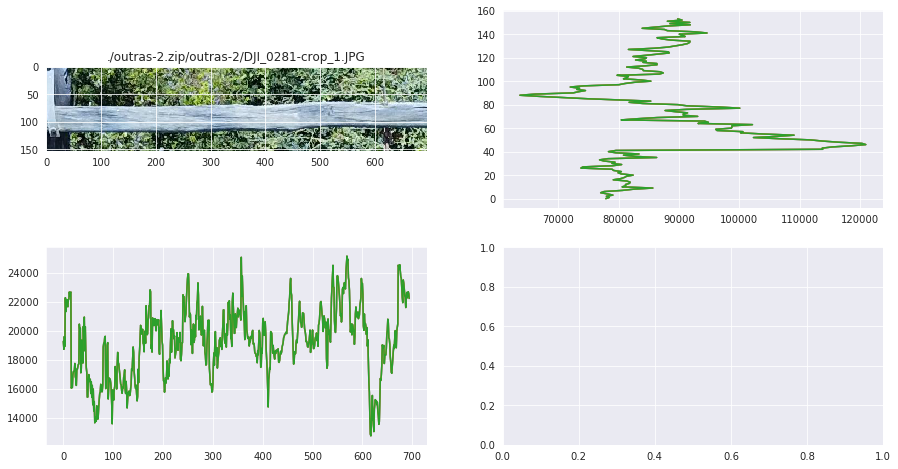

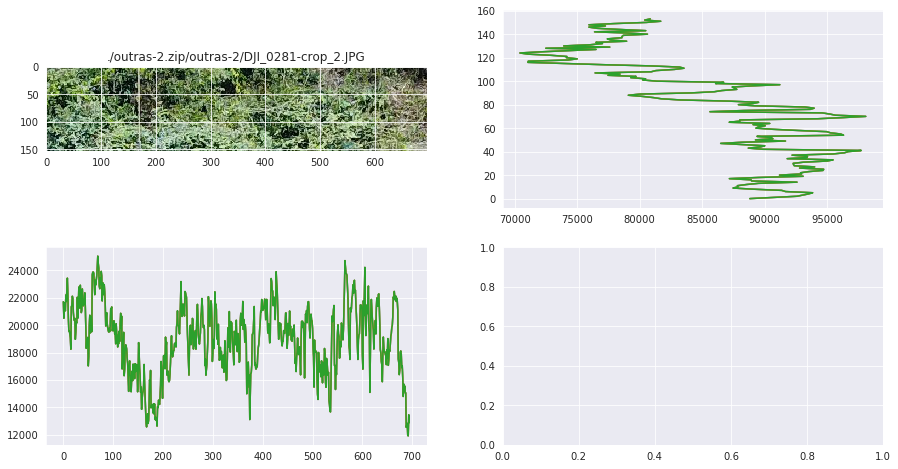

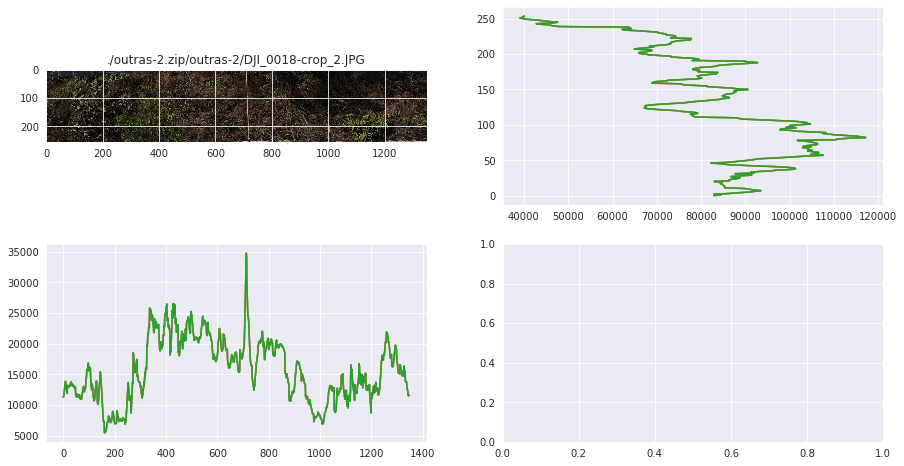

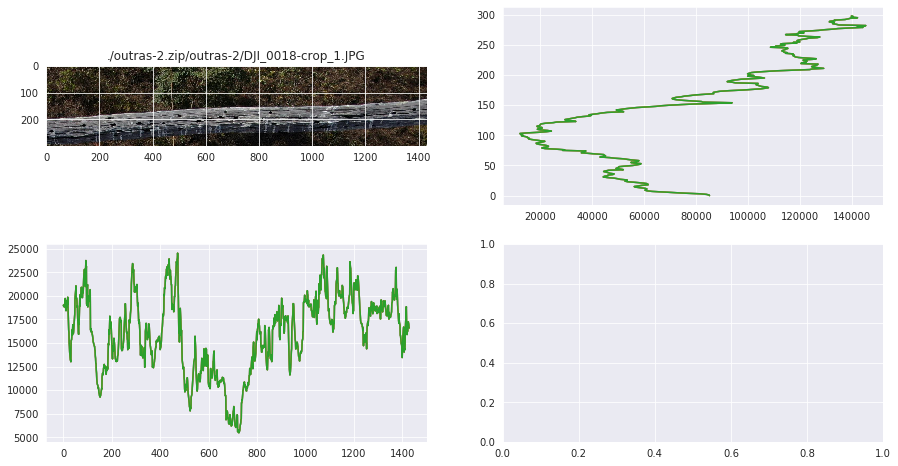

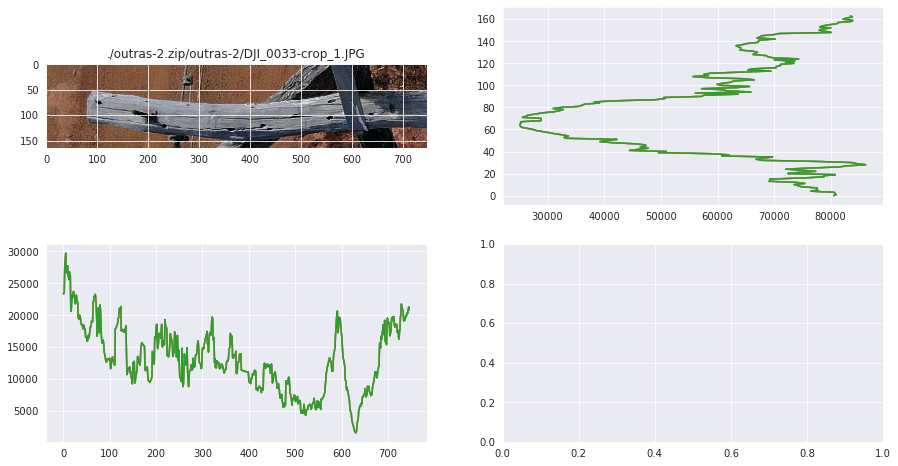

In [8]:
for path in path_list:
  img:np.ndarray = imread(path)
  
  for row in img:
    for i, pixel in enumerate(row):
      row[i] = np.var(pixel)
  
  h, w, pixel = img.shape

  soma_vertical = img.sum(axis=0)
  soma_horizontal = img.sum(axis=1)

  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
  ax[0, 0].title.set_text(path)
  ax[0, 0].imshow(imread(path))
  ax[0, 1].plot(soma_horizontal, range(h-1, -1, -1))
  ax[1, 0].plot(range(w), soma_vertical)

  plt.show()

## Explorando soma dos píxels (na vertical e horizontal) por cor (RGB)

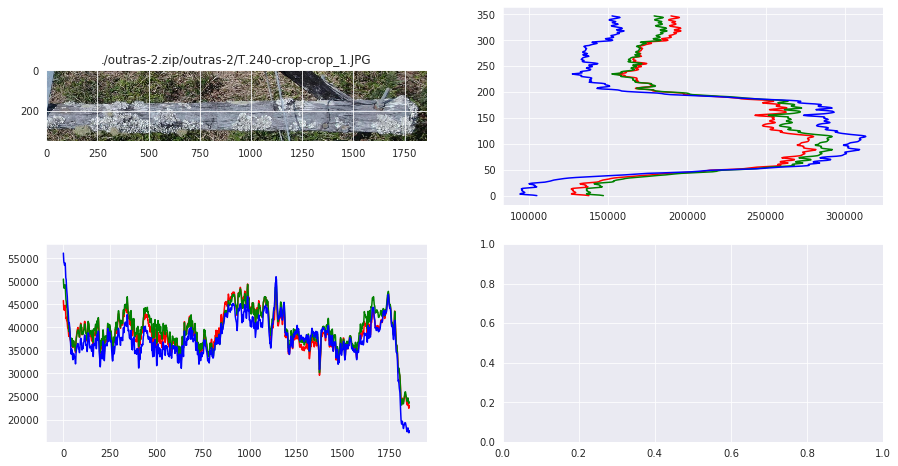

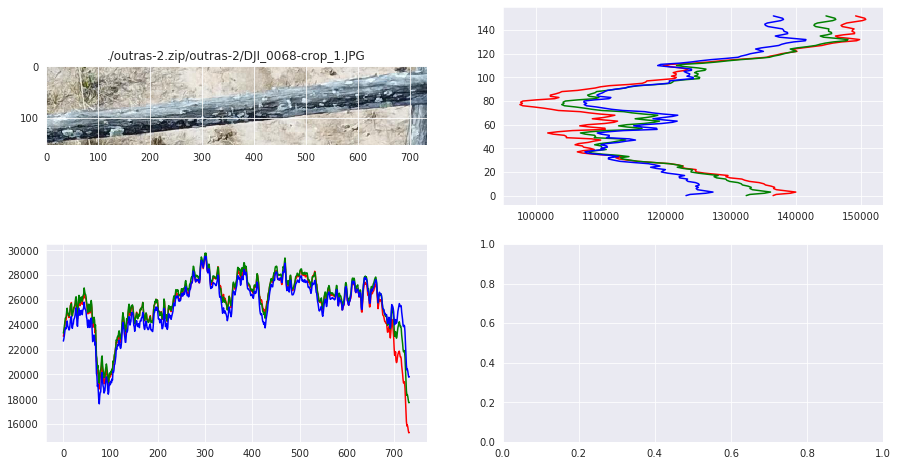

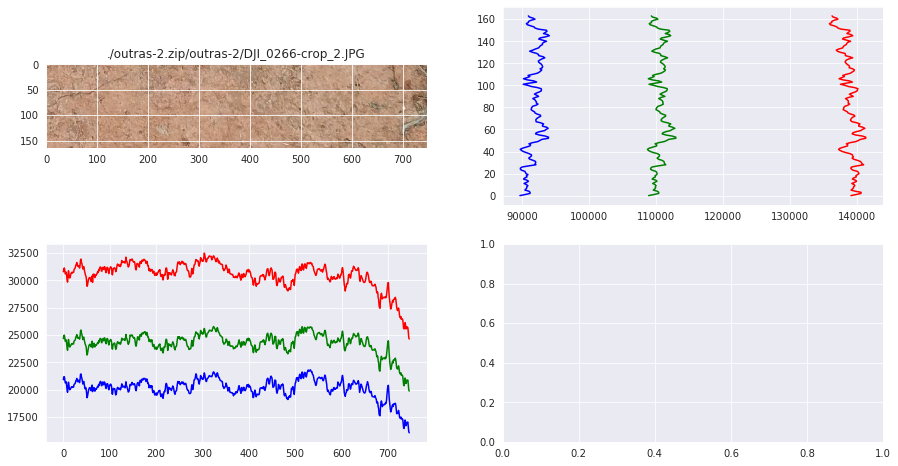

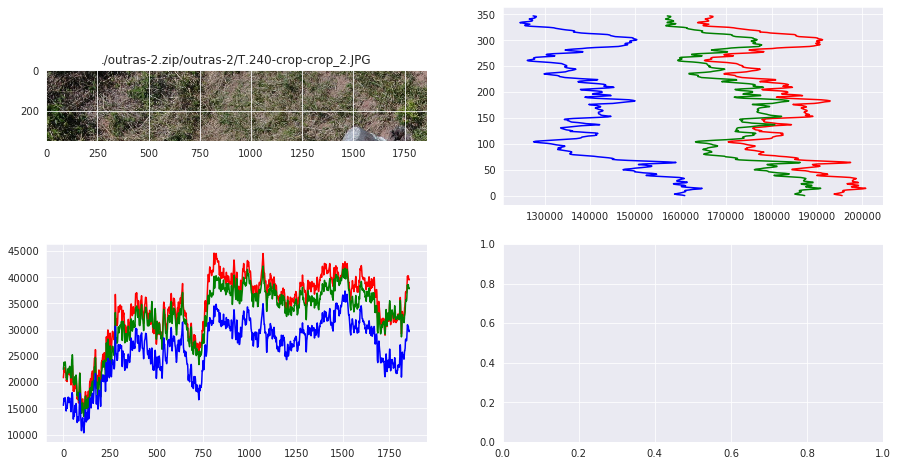

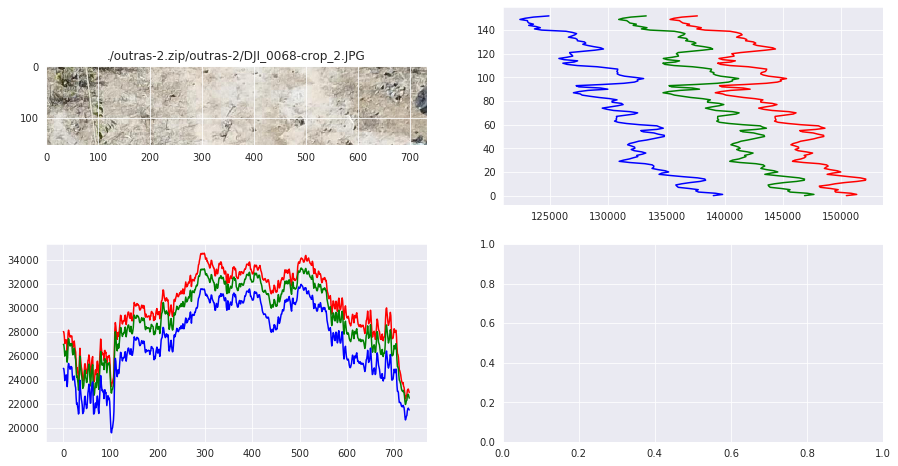

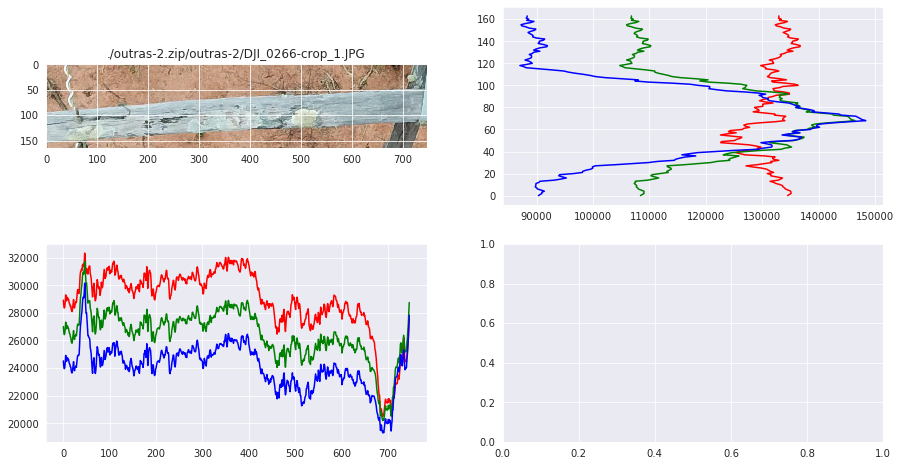

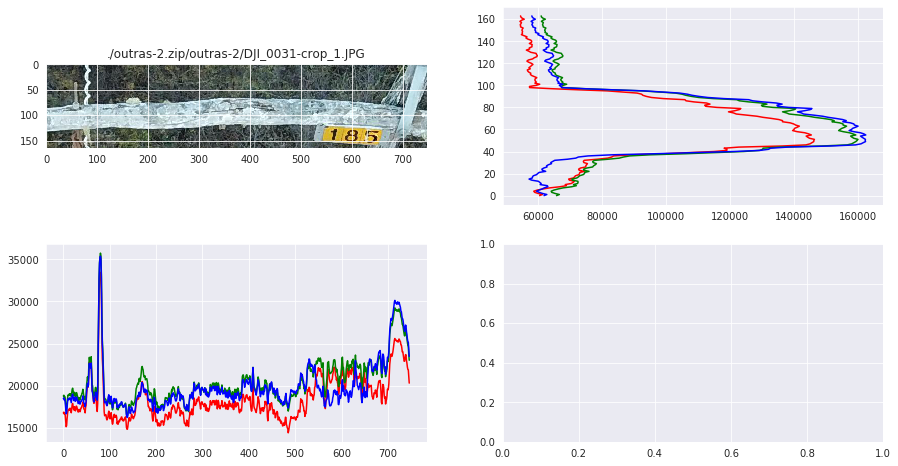

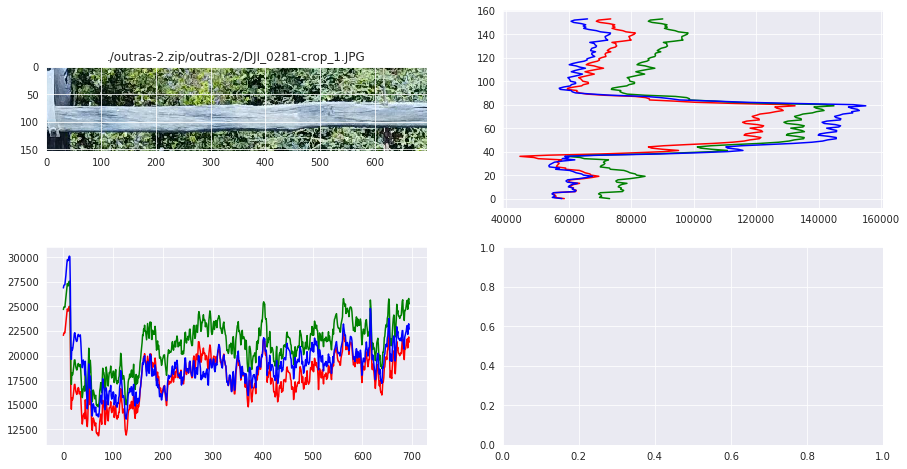

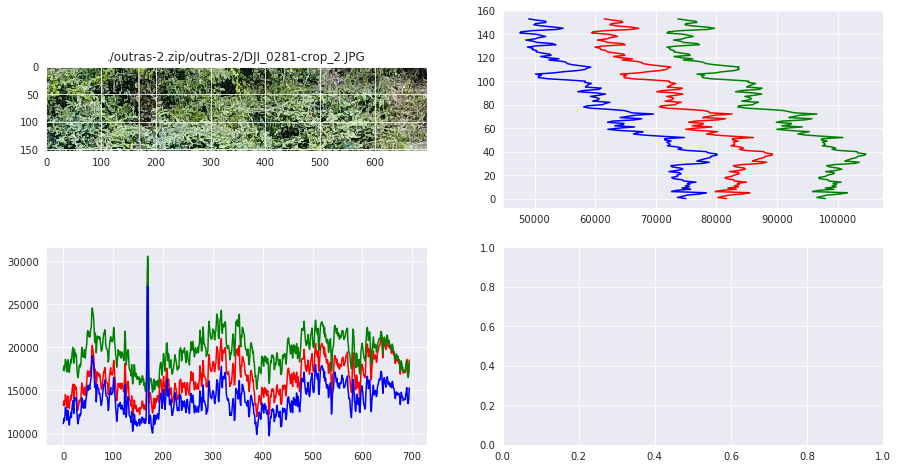

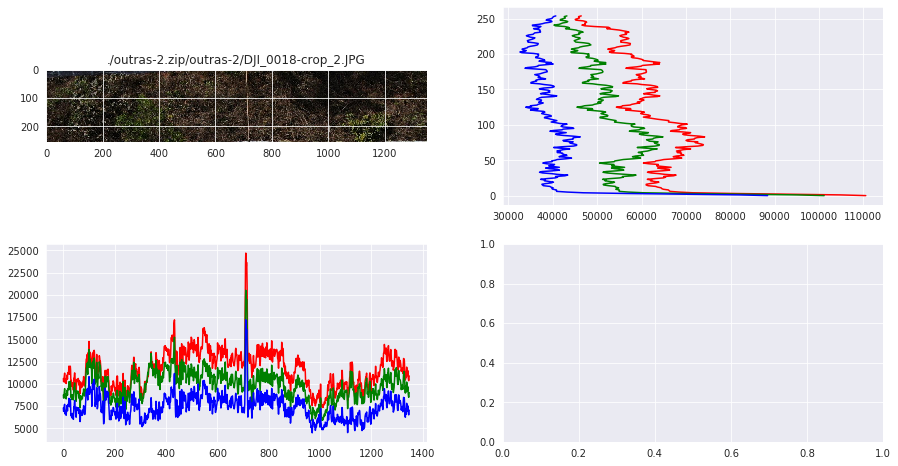

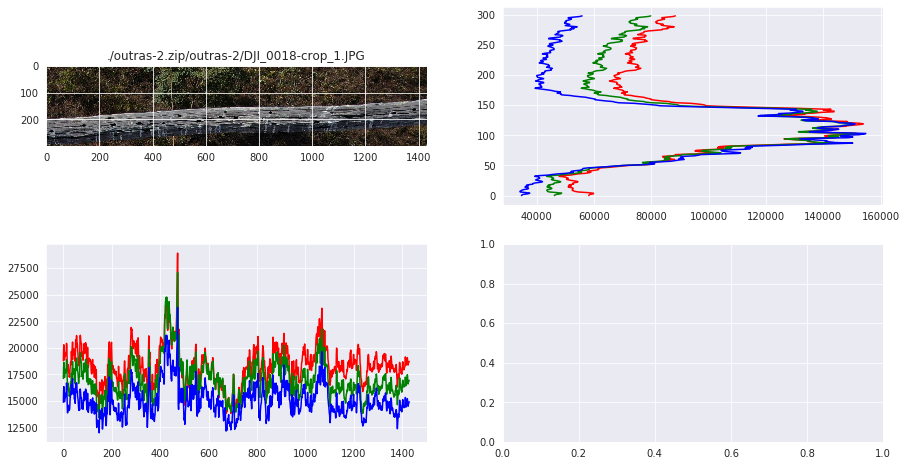

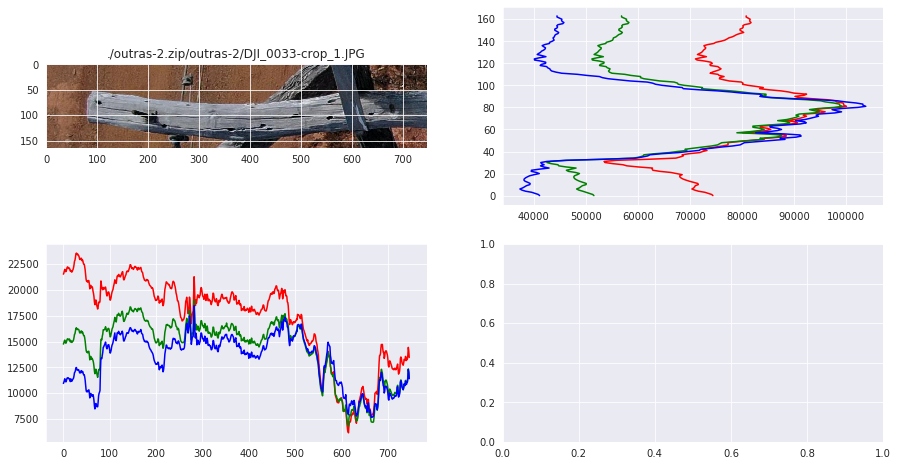

In [12]:
for path in path_list:
  img:np.ndarray = imread(path)
  
  h, w, pixel = img.shape
  soma_vertical_R, soma_vertical_G, soma_vertical_B = img.sum(axis=0).transpose()
  soma_horizontal_R, soma_horizontal_G, soma_horizontal_B = img.sum(axis=1).transpose()

  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
  ax[0, 0].title.set_text(path)
  ax[0, 0].imshow(imread(path))

  ax[0, 1].plot(soma_horizontal_R, range(h-1, -1, -1), 'r-')
  ax[0, 1].plot(soma_horizontal_G, range(h-1, -1, -1), 'g-')
  ax[0, 1].plot(soma_horizontal_B, range(h-1, -1, -1), 'b-')

  ax[1, 0].plot(range(w), soma_vertical_R, 'r-')
  ax[1, 0].plot(range(w), soma_vertical_G, 'g-')
  ax[1, 0].plot(range(w), soma_vertical_B, 'b-')